In [3]:
import drjit as dr
import mitsuba as mi

mi.set_variant("cuda_ad_rgb")

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from mitsuba.python.ad.integrators.common import ADIntegrator, mis_weight
from tqdm import tqdm

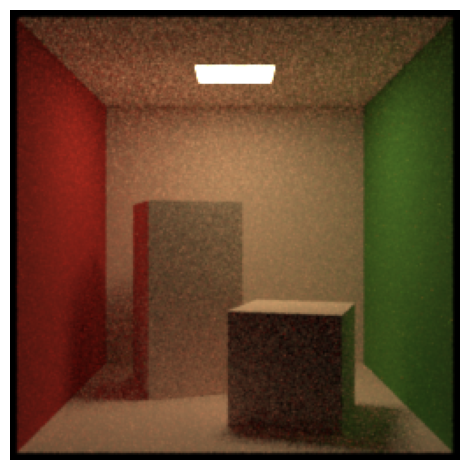

In [4]:
# Easy scene
scene_dict = mi.cornell_box()
scene = mi.load_dict(scene_dict)
original_image = mi.render(scene, spp=16)

fig, ax = plt.subplots()
fig.patch.set_visible(False)  # Hide the figure's background
ax.axis('off')  # Remove the axes from the image
fig.tight_layout()  # Remove any extra white spaces around the image
ax.imshow(np.clip(original_image ** (1.0 / 2.2), 0, 1))

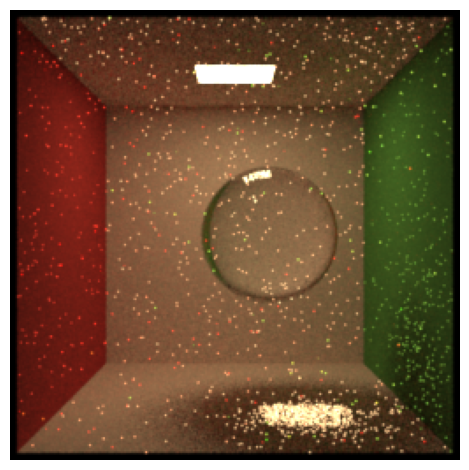

In [5]:
# Harder scene
# To change the order so that the declaration of glass BSDF occurs before the reference of it, we need to use the `pop` function.
scene_dict = mi.cornell_box()
scene_dict.pop("small-box")
scene_dict.pop("large-box")
scene_dict["glass"] = {"type": "dielectric"}
scene_dict["ball"] = {
    "type": "sphere",
    "to_world": mi.ScalarTransform4f.scale([0.4, 0.4, 0.4]).translate([0.5, 0, 0.5]),
    "bsdf": {"type": "ref", "id": "glass"}
}

scene = mi.load_dict(scene_dict)
original_image = mi.render(scene, spp=16)

fig, ax = plt.subplots()
fig.patch.set_visible(False)  # Hide the figure's background
ax.axis('off')  # Remove the axes from the image
fig.tight_layout()  # Remove any extra white spaces around the image
ax.imshow(np.clip(original_image ** (1.0 / 2.2), 0, 1))